In [23]:

import yolo
import loader
import torch
import lable
from importlib import reload
reload(yolo)
reload(loader)

from yolo import Yolo
from loader import VocSet
from torch import tensor
from lable import Lable
from lable import Rectangle
import torch.nn as nn
import torchvision.models as models
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import cv2
import xml.etree.ElementTree as ET

In [17]:
tree = ET.parse(f'VOC2007/Annotations/{name}.xml')
root = tree.getroot()
width = float(root[4][0].text)
height = float(root[4][1].text)
rectangles = list()

NameError: name 'name' is not defined

In [24]:
location = 223
name = images.loc[location].values[0]
lb = Lable(f'VOC2007/Annotations/{name}.xml')

In [25]:
lb.root

AttributeError: 'Lable' object has no attribute 'root'

In [19]:
images = pd.read_csv("VOC2007/ImageSets/Layout/train.txt",header=None,dtype=str)

In [6]:
dataset = VocSet("VOC2007/ImageSets/Layout/train.txt","","")

In [7]:
location = 223
name = images.loc[location].values[0]
image = plt.imread(f'VOC2007/JPEGImages/{name}.jpg')[...,::-1]/255
image =  cv2.resize(image, (448,448))


In [18]:
name = images.loc[location].values[0]
tree = ET.parse(f'VOC2007/Annotations/{name}.xml')
root = tree.getroot()

NameError: name 'images' is not defined

In [4]:
name

'006104'

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


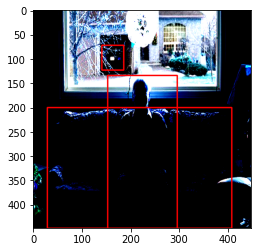

In [9]:
width = float(root[4][0].text)
height = float(root[4][1].text)
procx = lambda x: int((float(x)/width)*448)
procy = lambda x: int((float(x)/height)*448)
for el in root.iter('object'):
    xmin = procx(el[4][0].text)
    ymin = procy(el[4][1].text)
    xmax = procx(el[4][2].text)
    ymax = procy(el[4][3].text)
    cv2.rectangle(image, (xmin,ymin), (xmax,ymax), (255,0,0), 2)
mean = [0.485, 0.456, 0.406]
std = [0.229, 0.224, 0.225]
image = (image - mean)/std

plt.imshow(image)

In [3]:
yolo = Yolo("checkpoints/resnet34-333f7ec4.pth")
randim = torch.rand(1,3,448,448)

In [7]:
pred = yolo(randim)

In [15]:
pred[:,4,:,:].unsqueeze(-1).shape

torch.Size([1, 7, 7, 1])